### 0x02 多项式回归实现思路

In [2]:
%matplotlib inline

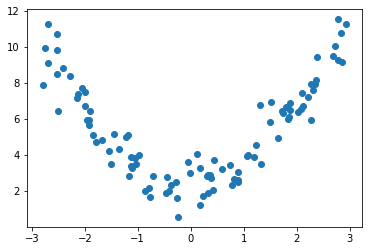

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 + x**2 + 2 + np.random.normal(0, 1, size=100)
plt.scatter(x, y)
plt.show()

#### 直接使用线性回归拟合数据 

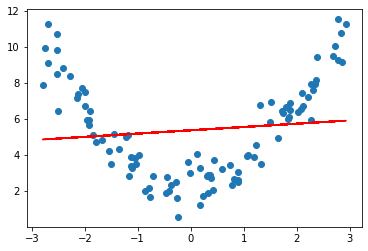

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(x, y_predict, color='r')
plt.show()

#### 添加一个特征，即对于X中的每个数据进行平方 

In [5]:
# 创建一个新的特征
(X**2).shape

(100, 1)

In [6]:
# 凭借一个新的数据数据集
X2 = np.hstack([X, X**2])

In [7]:
# 用新的数据集进行线性回归训练
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

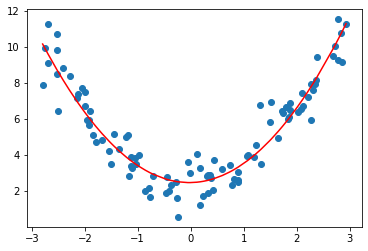

In [8]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [9]:
lin_reg2.coef_

array([0.05765786, 1.00454029])

In [10]:
lin_reg2.intercept_

2.458868794159915

### 一元多项式回归

In [11]:
from sklearn.preprocessing import PolynomialFeatures

# 这个degree表示我们使用多少次幂的多项式
poly = PolynomialFeatures(degree=2)    
poly.fit(X)
X2 = poly.transform(X)
X2.shape

(100, 3)

In [12]:
X2[:5,:]

array([[ 1.        ,  0.43026576,  0.18512862],
       [ 1.        , -1.67608055,  2.80924602],
       [ 1.        , -0.71044217,  0.50472808],
       [ 1.        ,  0.18256774,  0.03333098],
       [ 1.        , -1.10534945,  1.22179741]])

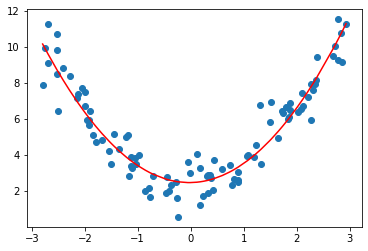

In [13]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X2, y)
y_predict = reg.predict(X2)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [14]:
reg.coef_

array([0.        , 0.05765786, 1.00454029])

In [15]:
reg.intercept_

2.4588687941599137

### 多元多项式回归

In [16]:
import numpy as np

X = np.arange(1, 11).reshape(5, 2)
# 5行2列 10个元素的矩阵
X.shape

(5, 2)

In [30]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit(X)
# 将X转换成最多包含X二次幂的数据集
X2 = poly.transform(x.reshape(-1, 2))
# 5行6列
X2.shape

(50, 6)

In [31]:
X2

array([[ 1.00000000e+00,  4.30265760e-01, -1.67608055e+00,
         1.85128624e-01, -7.21160074e-01,  2.80924602e+00],
       [ 1.00000000e+00, -7.10442173e-01,  1.82567742e-01,
         5.04728081e-01, -1.29703823e-01,  3.33309804e-02],
       [ 1.00000000e+00, -1.10534945e+00, -2.50550369e-01,
         1.22179741e+00,  2.76945712e-01,  6.27754872e-02],
       [ 1.00000000e+00,  1.23534052e+00, -1.04941984e+00,
         1.52606620e+00, -1.29639085e+00,  1.10128200e+00],
       [ 1.00000000e+00, -2.70162232e+00,  2.30721834e+00,
         7.29876316e+00, -6.23323256e+00,  5.32325647e+00],
       [ 1.00000000e+00,  1.52405652e+00,  2.09167027e+00,
         2.32274829e+00,  3.18782372e+00,  4.37508452e+00],
       [ 1.00000000e+00, -2.53238824e+00, -7.75426961e-01,
         6.41299018e+00,  1.96368211e+00,  6.01286971e-01],
       [ 1.00000000e+00, -2.05632275e+00,  1.33173426e+00,
         4.22846324e+00, -2.73847545e+00,  1.77351613e+00],
       [ 1.00000000e+00,  1.49635859e+00, -1.024

In [36]:
poly = PolynomialFeatures(degree=3)
poly.fit(x.reshape(1, -1))
x3 = poly.transform(x.reshape(1, -1))
x3.shape

(1, 176851)

##  模型正则化：L1正则、L2正则

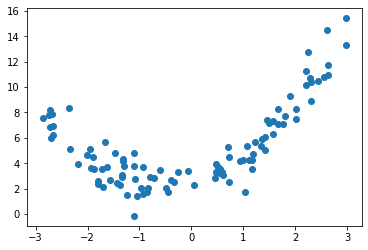

In [38]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 + x**2 + x + 2 + np.random.normal(0, 1, size=100)
plt.scatter(x, y)

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

lin_reg = LinearRegression()
def PolynomialRegression(degree):
    return Pipeline([
        ('poly',PolynomialFeatures(degree)),
        ('std_scaler',StandardScaler()),
        ('lin_reg',lin_reg)
    ])
np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X,y)

poly30_reg = PolynomialRegression(degree=30)
poly30_reg.fit(X_train,y_train)
y30_predict = poly30_reg.predict(X_test)
mean_squared_error(y_test,y30_predict)

5.43630702966035

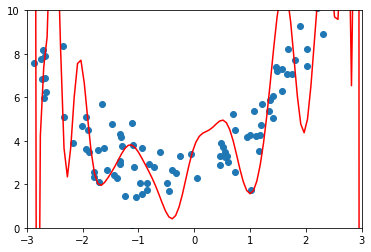

In [40]:
X_plot = np.linspace(-3,3,100).reshape(100,1)
y_plot = poly30_reg.predict(X_plot)
plt.scatter(X,y)
plt.plot(X_plot[:,0],y_plot,color='r')
plt.axis([-3,3,0,10])
plt.show()

In [41]:
from sklearn.linear_model import Lasso

def LassoRegression(degree,alpha):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('lasso_reg',Lasso(alpha=alpha))
    ])

In [42]:
lasso_reg1 = LassoRegression(30,0.0001)
lasso_reg1.fit(X_train,y_train)
y1_predict=lasso_reg1.predict(X_test)
mean_squared_error(y_test,y1_predict)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.17632019516742, tolerance: 0.08470830761183985
  positive)


1.0447596723311217

In [44]:
lasso_reg3 = LassoRegression(30,10)
lasso_reg3.fit(X_train,y_train)
y3_predict=lasso_reg3.predict(X_test)
mean_squared_error(y_test,y3_predict)

6.121892900299197

In [45]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
# 需要传入一个多项式项数的参数degree以及一个alpha值
def ridgeregression(degree,alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("standard", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha))   #alpha值就是正则化那一项的系数
    ])

In [46]:
ridge1_reg = ridgeregression(degree=30,alpha=0.0001)
ridge1_reg.fit(X_train,y_train)
y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test,y1_predict)

1.1391746618737042